<a href="https://colab.research.google.com/github/CubeVic/Machine_Learning/blob/main/%5BFreeCodeCamp%5D%5B002%5Dcat_dog_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data structure

This is the folder structure of the traning and testing data
```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```

# Load the libraries necessaries

In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Download the zipfiles and get the URL to the resourse

In [3]:
URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Exception: ignored

In [4]:

directory = "test_subfolder"
  

parent_dir = test_dir
  

test_subfolder = os.path.join(parent_dir, directory) 
  
os.mkdir(test_subfolder) 
print(test_dir)

NameError: ignored

In [ ]:
import shutil
source_dir = parent_dir
target_dir = test_subfolder
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)



1.   We are going to work with `ImageDataGenerator` and use `rescale` parameter to rescale the data
2.   We will use the `flow_from_directory` to load the data in batches, I will use the values of `IMG_HEGIGHT` and `IMG_WIDTH` and the other required data.


> *   `class_mode` will be set as binary since there are just 2 clasess to choose from 
> *   `shuffle=False` was added to the test data
*   previously a new subdirectory was create and all picture move there



After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
```

I'm not going to use image aumentation, but i can return later to  chek if it is need it 

# Preparing the data

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                                              directory=train_dir,
                                              target_size =(IMG_HEIGHT,IMG_WIDTH),
                                              batch_size=batch_size,
                                              class_mode='binary' )
val_data_gen = validation_image_generator.flow_from_directory(
                                              directory=validation_dir,
                                              target_size=(IMG_HEIGHT,IMG_WIDTH),
                                              batch_size=batch_size,
                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
                                              directory=test_dir,
                                              target_size=(IMG_HEIGHT,IMG_WIDTH),
                                              batch_size=batch_size,
                                              shuffle=False, 
                                              class_mode='binary')                                             

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


# Exploring the data generated 

The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

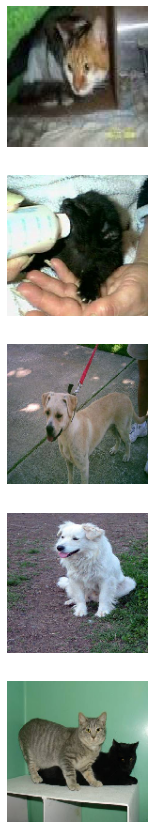

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Recreate the `train_image_generator` using `ImageDataGenerator`. 

Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to `ImageDataGenerator`. Make sure to rescale the same as before.


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                        rotation_range=30,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.2,
                        channel_shift_range=0.5,
                        horizontal_flip=True,
                        vertical_flip=False,)


You don't have to do anything for the next cell. `train_data_gen` is created just like before but with the new `train_image_generator`. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


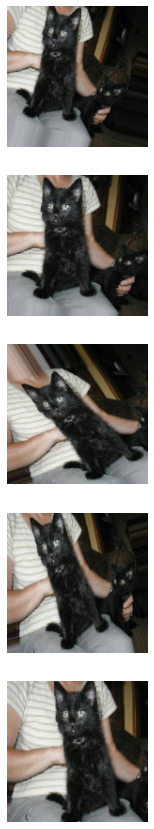

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

# Creating the Model

In the cell below, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in `metrics=['accuracy']` to view training and validation accuracy for each training epoch.

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18496)            

## Compiling the model

Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_data_gen,
    steps_per_epoch=16,
    epochs=epochs,
    validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 15s 957ms/step - loss: 0.7170 - accuracy: 0.5130 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 15s 929ms/step - loss: 0.6882 - accuracy: 0.5145 - val_loss: 0.6768 - val_accuracy: 0.5670
Epoch 3/15
16/16 [==============================] - 15s 925ms/step - loss: 0.6699 - accuracy: 0.6055 - val_loss: 0.6372 - val_accuracy: 0.6440
Epoch 4/15
16/16 [==============================] - 15s 930ms/step - loss: 0.6560 - accuracy: 0.6145 - val_loss: 0.6324 - val_accuracy: 0.6530
Epoch 5/15
16/16 [==============================] - 15s 925ms/step - loss: 0.6468 - accuracy: 0.6375 - val_loss: 0.6242 - val_accuracy: 0.6700
Epoch 6/15
16/16 [==============================] - 15s 934ms/step - loss: 0.6071 - accuracy: 0.6810 - val_loss: 0.5876 - val_accuracy: 0.6700
Epoch 7/15
16/16 [==============================] - 15s 929ms/step - loss: 0.5807 - accuracy: 0.7040 - val_loss: 0.5588 - val_accuracy: 0.7140

Run the next cell to visualize the accuracy and loss of the model.

## Analizing the results

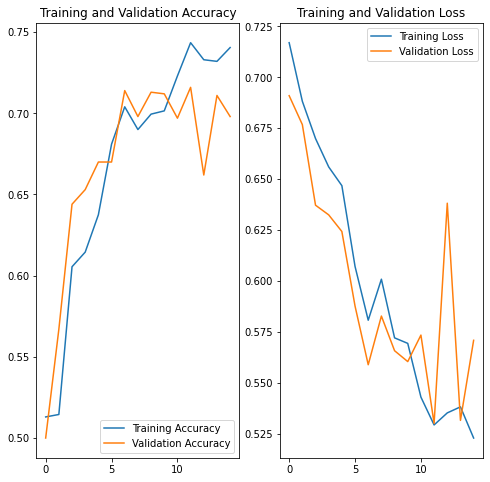

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this final cell, get the probability that each test image (from `test_data_gen`) is a dog or a cat. `probabilities` should be a list of integers. 

Call the `plotImages` function and pass in the test images and the probabilities corresponding to each test image.

After your run the cell, you should see all 50 test images with a label showing the percentage sure that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

[0.4887038767337799, 0.2316502332687378, 0.04510585591197014, 0.8164464235305786, 0.21210305392742157, 0.34944242238998413, 0.6942064762115479, 0.16079238057136536, 0.08824943751096725, 0.919687032699585, 0.17052362859249115, 0.6006845831871033, 0.09270317852497101, 0.202505424618721, 0.3370482623577118, 0.6446253657341003, 0.8450734615325928, 0.9268929958343506, 0.5145650506019592, 0.5537607669830322, 0.05085369199514389, 0.5490647554397583, 0.12569288909435272, 0.5598575472831726, 0.8644591569900513, 0.2481532096862793, 0.7972536683082581, 0.12689322233200073, 0.23535889387130737, 0.40944772958755493, 0.10327883064746857, 0.09459082782268524, 0.9137013554573059, 0.9995735287666321, 0.08161967247724533, 0.5176879167556763, 0.9906578063964844, 0.38170650601387024, 0.47125983238220215, 0.30949074029922485, 0.16384102404117584, 0.0838555246591568, 0.9432022571563721, 0.8101266026496887, 0.08529151231050491, 0.1284051388502121, 0.30094850063323975, 0.1253177970647812, 0.2376580387353897, 

TypeError: ignored

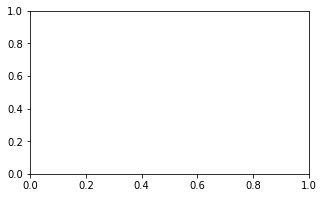

In [ ]:

probabilities_raw = model.predict(test_data_gen).tolist()
probabilities = list()
for probability in probabilities_raw:
    probabilities.append(probability[0])

print(probabilities)
plotImages(test_data_gen,probabilities)

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.78% of the images of cats and dogs.
You passed the challenge!
